In [2]:
import sep
from astropy.io import fits
from astropy.modeling import rotations
import numpy as np
import matplotlib.pyplot as plt
from astropy.utils.data import download_file
from astropy import units as u
%matplotlib inline

In [3]:
f105w = download_file('https://archive.stsci.edu/pub/hlsp/hudf12/hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
hdul = fits.open(f105w)
data = hdul[0].data
hdul.info()
hdul.close()

Filename: /var/folders/zz/zyxvpxvq6csfxvn_n000x_6m007_jn/T/tmpkdrjlv5o
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


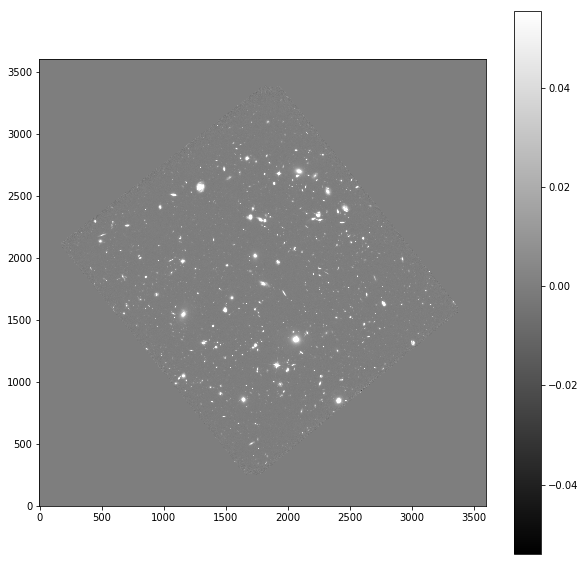

In [4]:
m, s = np.mean(data), np.std(data)
plt.figure(figsize=(10,10))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [5]:
data = data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(data, bw=16, bh=16)

In [6]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005099902045913041


In [7]:
bkg_f105w = bkg.back()

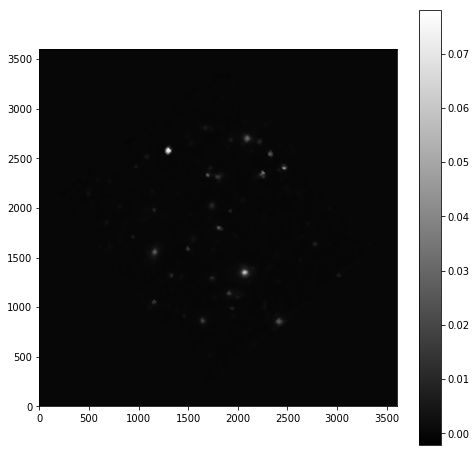

In [8]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_f105w, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [9]:
bkg_rms = bkg.rms()

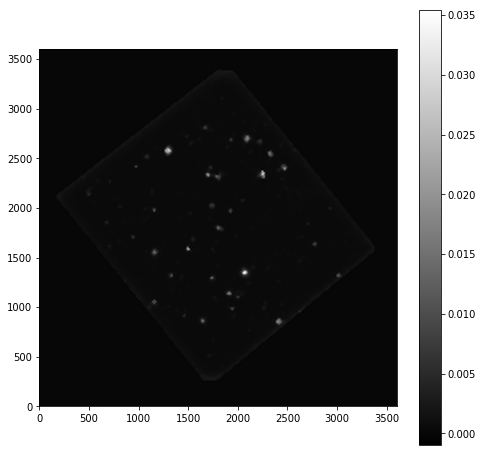

In [10]:
plt.figure(figsize=(8,8))
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [11]:
data_sub = data - bkg

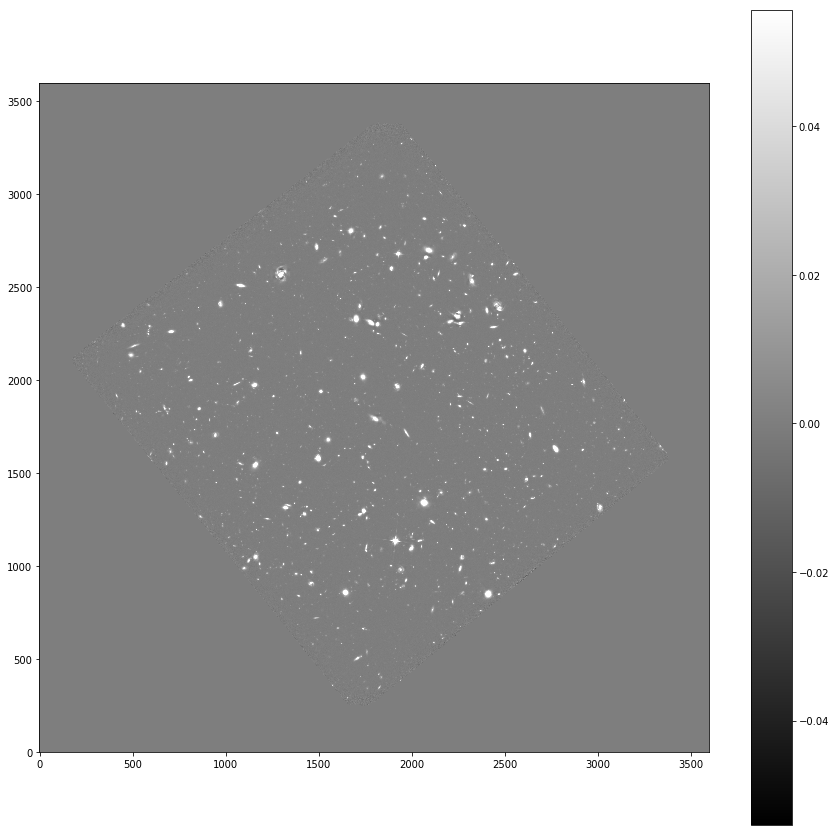

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

In [13]:
msk = data<=0.02
objects = sep.extract(data_sub, 3, err=bkg.globalrms, mask=msk)

In [14]:
len(objects)

810

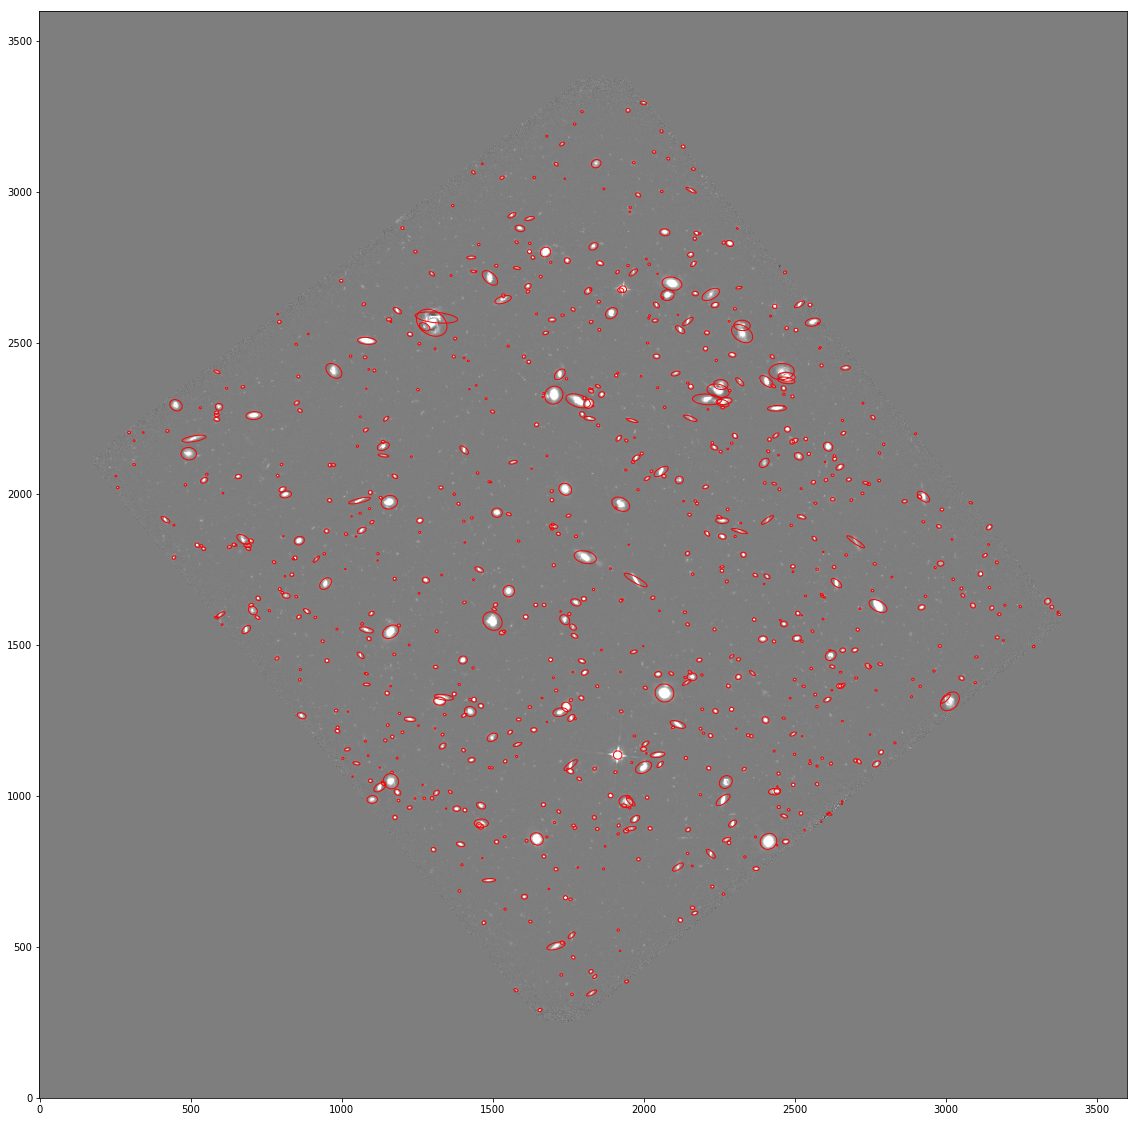

In [15]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(20,20))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),width=8*objects['a'][i],height=8*objects['b'][i],angle=objects['theta'][i]*180/(2*np.pi))
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub,objects['x'],objects['y'],3.0,err=bkg.globalrms,mask=msk, gain=1.0)

In [17]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,flux[i],fluxerr[i]))

object 0: flux = 1.247050 +/- 1.116717
object 1: flux = 0.686795 +/- 0.828735
object 2: flux = 1.114998 +/- 1.055938
object 3: flux = 1.217056 +/- 1.103206
object 4: flux = 0.899049 +/- 0.948186
object 5: flux = 0.823192 +/- 0.907303
object 6: flux = 0.761383 +/- 0.872577
object 7: flux = 1.263850 +/- 1.124214
object 8: flux = 1.067958 +/- 1.033424
object 9: flux = 0.571732 +/- 0.756134


In [18]:
for i in range(810):
    Mags = {}
    Mags[i] = u.Magnitude(flux[i])
    print(Mags)

{0: <Magnitude 1.24705008 mag>}
{1: <Magnitude 0.68679456 mag>}
{2: <Magnitude 1.11499831 mag>}
{3: <Magnitude 1.21705583 mag>}
{4: <Magnitude 0.89904862 mag>}
{5: <Magnitude 0.82319183 mag>}
{6: <Magnitude 0.76138266 mag>}
{7: <Magnitude 1.26384954 mag>}
{8: <Magnitude 1.0679583 mag>}
{9: <Magnitude 0.57173152 mag>}
{10: <Magnitude 3.18421469 mag>}
{11: <Magnitude 0.83105919 mag>}
{12: <Magnitude 1.0527996 mag>}
{13: <Magnitude 0.67878291 mag>}
{14: <Magnitude 1.43656543 mag>}
{15: <Magnitude 0.85556561 mag>}
{16: <Magnitude 2.2282096 mag>}
{17: <Magnitude 1.21308372 mag>}
{18: <Magnitude 0.6362079 mag>}
{19: <Magnitude 0.80476338 mag>}
{20: <Magnitude 0.640895 mag>}
{21: <Magnitude 8.20261571 mag>}
{22: <Magnitude 1.29652715 mag>}
{23: <Magnitude 0.66673601 mag>}
{24: <Magnitude 0.7499287 mag>}
{25: <Magnitude 0.59049103 mag>}
{26: <Magnitude 0.94978142 mag>}
{27: <Magnitude 1.41938108 mag>}
{28: <Magnitude 0.67708784 mag>}
{29: <Magnitude 1.08661626 mag>}
{30: <Magnitude 0.58598227 

{321: <Magnitude 2.72806564 mag>}
{322: <Magnitude 0.81010061 mag>}
{323: <Magnitude 0.69980225 mag>}
{324: <Magnitude 1.97649909 mag>}
{325: <Magnitude 0.97202865 mag>}
{326: <Magnitude 1.27161061 mag>}
{327: <Magnitude 5.49965651 mag>}
{328: <Magnitude 0.59649502 mag>}
{329: <Magnitude 6.94007556 mag>}
{330: <Magnitude 0.95817343 mag>}
{331: <Magnitude 0.89721104 mag>}
{332: <Magnitude 0.85128407 mag>}
{333: <Magnitude 0.94559018 mag>}
{334: <Magnitude 1.71569991 mag>}
{335: <Magnitude 2.66657891 mag>}
{336: <Magnitude 0.74533976 mag>}
{337: <Magnitude 0.63537651 mag>}
{338: <Magnitude 0.56521921 mag>}
{339: <Magnitude 0.59837036 mag>}
{340: <Magnitude 0.62862527 mag>}
{341: <Magnitude 2.10255708 mag>}
{342: <Magnitude 0.79825205 mag>}
{343: <Magnitude 0.57309519 mag>}
{344: <Magnitude 1.45112742 mag>}
{345: <Magnitude 1.09722562 mag>}
{346: <Magnitude 0.67203061 mag>}
{347: <Magnitude 3.88631881 mag>}
{348: <Magnitude 0.89053193 mag>}
{349: <Magnitude 0.65811203 mag>}
{350: <Magnitu

{777: <Magnitude 2.32517028 mag>}
{778: <Magnitude 4.92137854 mag>}
{779: <Magnitude 0.57308657 mag>}
{780: <Magnitude 0.93892003 mag>}
{781: <Magnitude 1.79080181 mag>}
{782: <Magnitude 0.88729164 mag>}
{783: <Magnitude 1.75482636 mag>}
{784: <Magnitude 0.58138373 mag>}
{785: <Magnitude 0.64191646 mag>}
{786: <Magnitude 0.73448707 mag>}
{787: <Magnitude 1.06612122 mag>}
{788: <Magnitude 0.66442625 mag>}
{789: <Magnitude 0.69792779 mag>}
{790: <Magnitude 1.21062304 mag>}
{791: <Magnitude 0.60792611 mag>}
{792: <Magnitude 0.79400833 mag>}
{793: <Magnitude 0.82784048 mag>}
{794: <Magnitude 0.92636725 mag>}
{795: <Magnitude 0.78027403 mag>}
{796: <Magnitude 0.73261997 mag>}
{797: <Magnitude 0.97394095 mag>}
{798: <Magnitude 0.61764455 mag>}
{799: <Magnitude 1.52220843 mag>}
{800: <Magnitude 0.89696818 mag>}
{801: <Magnitude 0.91081135 mag>}
{802: <Magnitude 1.66213085 mag>}
{803: <Magnitude 1.01450021 mag>}
{804: <Magnitude 0.60224511 mag>}
{805: <Magnitude 0.84701132 mag>}
{806: <Magnitu

In [19]:
hdul[0].header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 3600 / Axis length                                    
NAXIS2  =                 3600 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     
FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName 
OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '2012-12-04T19:09:11'                                                 
IRAF-MAX=           7.444648E1  /  DATA MAX                                     
IRAF-MIN=         -9.047293E

In [20]:
# Slice the data into 1296 sections of 100 x 100 arrays and place them into a dictionary
ndata = {}
for i in range(36):
    for n in range(36):
        ndata[36*i + n] = data[100*i:100*i+100:1,100*n:100*n+100:1]

In [21]:
# Convert the dictionary to a list
adata = np.array(list(ndata.values()))

In [22]:
ndata_sub = {}
grms = {}
gback = {}
for i in range(1296):
    # Subtract the background from each element in the adata list and place it in a dictionary
    ndata_sub[i] = adata[i] - sep.Background(adata[i], bw=32, bh=32)
    
    # Create a dict of all of the global rms values
    grms[i] = sep.Background(adata[i], bw=32, bh=32).globalrms
    
    # Create a dict of all of the global background values
    gback[i] = sep.Background(adata[i], bw=32, bh=32).globalback

# Convert the dict to a list
adata_sub = np.array(list(ndata_sub.values()))

In [23]:
agback = np.array(list(gback.values()))

In [24]:
# Convert the grms dict into a list, then take the average of all of the relevant grms values
agrms = np.array(list(grms.values()))
u = 0
for i in range(1296):
    if(agrms[i]==1):
        u += 1
    else:
        continue
Avg_agrms = (sum(agrms)-u)/(1296-u)

In [25]:
# Place the raw sep.extract data into the sxt dict and the len(sep.extract) data into an objects dict
objects = {}
sxt = {}
for i in range(1296):
    v = np.exp(agrms[i]/Avg_agrms)
    print(i,'\t',v)
    q = sep.extract(adata_sub[i], v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    sxt[i] = sep.extract(adata_sub[i], v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    if(len(q)>30):
        q = sep.extract(adata_sub[i], 30*v, err=sep.Background(adata[i], bw=32, bh=32).globalrms)
    objects[i] = len(q)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


0 	 inf
1 	 inf
2 	 inf
3 	 inf
4 	 inf
5 	 inf
6 	 inf
7 	 inf
8 	 inf
9 	 inf
10 	 inf
11 	 inf
12 	 inf
13 	 inf
14 	 inf
15 	 inf
16 	 inf
17 	 inf
18 	 inf
19 	 inf
20 	 inf
21 	 inf
22 	 inf
23 	 inf
24 	 inf
25 	 inf
26 	 inf
27 	 inf
28 	 inf
29 	 inf
30 	 inf
31 	 inf
32 	 inf
33 	 inf
34 	 inf
35 	 inf
36 	 inf
37 	 inf
38 	 inf
39 	 inf
40 	 inf
41 	 inf
42 	 inf
43 	 inf
44 	 inf
45 	 inf
46 	 inf
47 	 inf
48 	 inf
49 	 inf
50 	 inf
51 	 inf
52 	 inf
53 	 inf
54 	 inf
55 	 inf
56 	 inf
57 	 inf
58 	 inf
59 	 inf
60 	 inf
61 	 inf
62 	 inf
63 	 inf
64 	 inf
65 	 inf
66 	 inf
67 	 inf
68 	 inf
69 	 inf
70 	 inf
71 	 inf
72 	 inf
73 	 inf
74 	 inf
75 	 inf
76 	 inf
77 	 inf
78 	 inf
79 	 inf
80 	 inf
81 	 inf
82 	 inf
83 	 inf
84 	 inf
85 	 inf
86 	 inf
87 	 inf
88 	 14.753468545284266
89 	 3.4250330770680404
90 	 10.47563468338378
91 	 inf
92 	 inf
93 	 inf
94 	 inf
95 	 inf
96 	 inf
97 	 inf
98 	 inf
99 	 inf
100 	 inf
101 	 inf
102 	 inf
103 	 inf
104 	 inf
105 	 inf
106 	 

601 	 2.166151268333857
602 	 2.2376589146965813
603 	 2.324891219041657
604 	 2.151505181713419
605 	 2.1565395575402606
606 	 2.185629112959438
607 	 2.377187401535153
608 	 4.188393647788875
609 	 4.885675812434857
610 	 inf
611 	 inf
612 	 inf
613 	 inf
614 	 inf
615 	 inf
616 	 3.5298734661465057
617 	 2.5005565310831943
618 	 2.037368463053173
619 	 2.0571252754062357
620 	 2.253505075016446
621 	 2.296350248672625
622 	 2.042982322520781
623 	 2.05508387460161
624 	 2.122811129587844
625 	 2.055775232876765
626 	 2.196460088606363
627 	 2.2359533517690107
628 	 2.104348381981096
629 	 2.5056903023479156
630 	 2.449117719196534
631 	 2.1058697118945426
632 	 2.0509860422133928
633 	 2.1886411347669936
634 	 2.0908189887029116
635 	 2.3613349191132462
636 	 2.2870031861917224
637 	 2.335083696736672
638 	 2.2451527094301986
639 	 2.114311718522634
640 	 2.1365369782823795
641 	 2.132487636987495
642 	 2.2167190371304204
643 	 3.65012131491749
644 	 5.356484884273438
645 	 inf
646 

1073 	 inf
1074 	 inf
1075 	 inf
1076 	 inf
1077 	 inf
1078 	 inf
1079 	 inf
1080 	 inf
1081 	 inf
1082 	 inf
1083 	 inf
1084 	 inf
1085 	 inf
1086 	 inf
1087 	 inf
1088 	 inf
1089 	 inf
1090 	 inf
1091 	 inf
1092 	 inf
1093 	 4.394575780392555
1094 	 4.918306677115444
1095 	 2.3804263983365725
1096 	 2.312570051862783
1097 	 2.429974956256998
1098 	 2.198266906041549
1099 	 2.1977157571476296
1100 	 2.4003169585051687
1101 	 3.4818013900448586
1102 	 7.579038913965064
1103 	 inf
1104 	 inf
1105 	 inf
1106 	 inf
1107 	 inf
1108 	 inf
1109 	 inf
1110 	 inf
1111 	 inf
1112 	 inf
1113 	 inf
1114 	 inf
1115 	 inf
1116 	 inf
1117 	 inf
1118 	 inf
1119 	 inf
1120 	 inf
1121 	 inf
1122 	 inf
1123 	 inf
1124 	 inf
1125 	 inf
1126 	 inf
1127 	 inf
1128 	 inf
1129 	 inf
1130 	 7.640770998770721
1131 	 4.413698688646282
1132 	 2.851114886781344
1133 	 2.4702018061744813
1134 	 2.2684212103271992
1135 	 2.300996941861973
1136 	 4.012870690802506
1137 	 5.322326259379905
1138 	 inf
1139 	 inf
1140 

In [26]:
# Convert objects dict into list
aobjects = np.array(list(objects.values()))

In [27]:
# Problematic slices
for i in range(1296):
    if(aobjects[i]>=25):
        print(i,'\t',aobjects[i])

350 	 26
475 	 33
536 	 40
651 	 37
820 	 46
944 	 61
1205 	 78
1207 	 91


In [28]:
dflux = {}
dfluxerr = {}
dflag = {}

for n in range(1296):
    dflux[n], dfluxerr[n], dflag[n] = sep.sum_circle(adata_sub[n],sxt[n]['x'],sxt[n]['y'],3.0,err=agrms[n], gain=1.0)

aflux = np.array(list(dflux.values()))
afluxerr = np.array(list(dfluxerr.values()))
aflag = np.array(list(dflag.values()))

1951


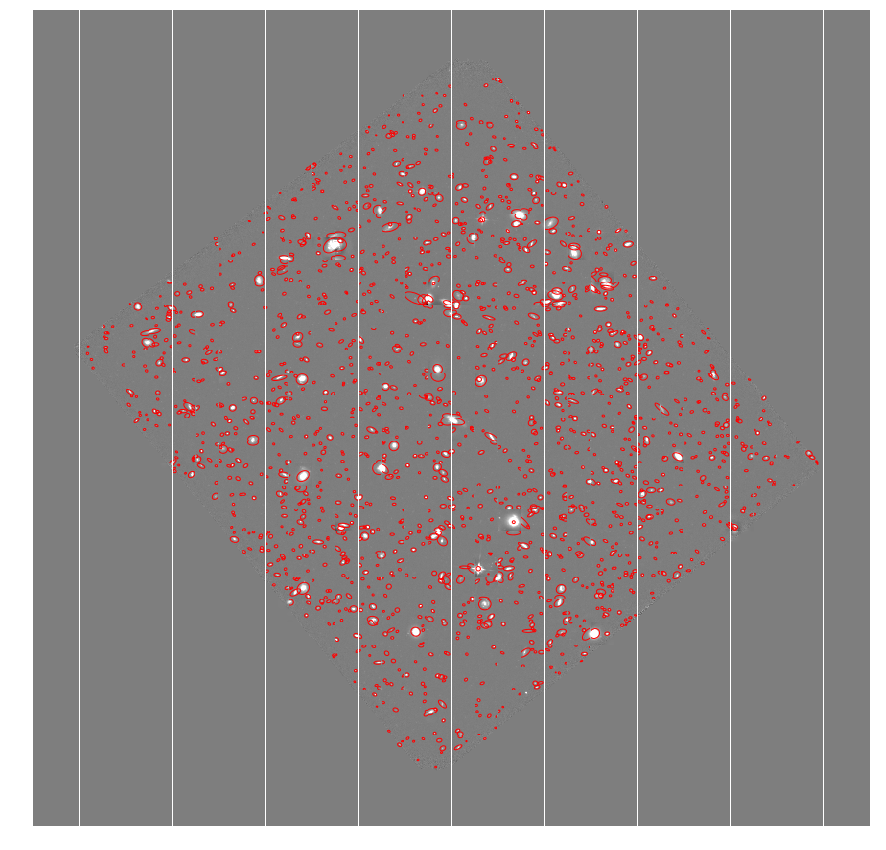

In [29]:
# Plot all of the background subtracted slices with ellipses around the objects
from matplotlib.patches import Ellipse

im = {}
fig, ax = plt.subplots(ncols=36, nrows=36, figsize=(15,15))
fig.subplots_adjust(hspace=0, wspace=0)
w = 0
z = 0
no = 0
m, s = np.mean(data_sub), np.std(data_sub)
for n in range(1296):
    im[n] = ax[35-z,w].imshow(adata_sub[n], interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
    ax[35-z,w].axis('off')
    
    if(aobjects[n]>=25):
        if(w==35):
            w = 0
            z += 1
        else:
            w += 1
    else:
        for i in range(aobjects[n]):
            try:
                if(aflux[n][i]<=0.1):
                    continue
                else:
                    try:
                        e = Ellipse(xy=(sxt[n]['x'][i], sxt[n]['y'][i]),width=6*sxt[n]['a'][i],height=6*sxt[n]['b'][i],\
                                    angle=sxt[n]['theta'][i]*180/(2*np.pi))
                    except:
                        continue
                    e.set_facecolor('none')
                    e.set_edgecolor('red')
                    ax[35-z,w].add_artist(e)
                    no += 1
            except:
                try:
                    e = Ellipse(xy=(sxt[n]['x'][i], sxt[n]['y'][i]),width=6*sxt[n]['a'][i],height=6*sxt[n]['b'][i],\
                                angle=sxt[n]['theta'][i]*180/(2*np.pi))
                except:
                    continue
                e.set_facecolor('none')
                e.set_edgecolor('red')
                ax[35-z,w].add_artist(e)
                no += 1
        if(w==35):
            w = 0
            z += 1
        else:
            w += 1
print(no)

### There are 1951 objects in this image, with uncertainty due to high noise around the border and the same objects being detected multiple times on slice boundaries.

## Aperature Photometry

In [30]:
fluxes = np.concatenate(aflux)
fluxerrs = np.concatenate(afluxerr)
flags = np.concatenate(aflag)

In [31]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i,fluxes[i],fluxerrs[i]))

object 0: flux = 1.144589 +/- 1.069895
object 1: flux = 0.029425 +/- 0.171590
object 2: flux = 0.082352 +/- 0.287001
object 3: flux = 0.039477 +/- 0.198732
object 4: flux = 0.105575 +/- 0.324951
object 5: flux = 0.055043 +/- 0.234651
object 6: flux = 0.042755 +/- 0.206815
object 7: flux = 0.032426 +/- 0.180123
object 8: flux = 0.069201 +/- 0.263096
object 9: flux = 0.017933 +/- 0.133983


In [32]:
print('Fluxes: ',len(fluxes))
print('Objects:',np.sum(aobjects))

Fluxes:  5093
Objects: 5072


(array([30.,  6.,  4.,  1., 10., 12., 11.,  9.,  6.,  8.,  9.,  6.,  9.,
         7.,  5., 15., 15., 25., 28., 40., 46., 46., 42., 70., 67., 56.,
        67., 55., 63., 66., 58., 72., 77., 50., 52., 60., 60., 56., 66.,
        55., 48., 56., 61., 46., 44., 47., 46., 46., 46., 38., 39., 33.,
        35., 29., 36., 32., 35., 35., 32., 28., 29., 26., 27., 26., 24.,
        19., 26., 28., 19., 18., 23., 27., 19., 22., 23., 22., 19., 17.,
        17., 25., 21., 18., 15., 22.,  9., 13., 21., 20., 17., 22., 25.,
        10., 14., 10., 23., 12., 11., 15., 14., 13., 17.,  6., 15., 15.,
         8., 16., 15., 11., 15., 15., 18., 11., 16., 12.,  4.,  9.,  4.,
         6., 11.,  9.,  7.,  5., 10.,  9., 20., 13., 10.,  7.,  8., 14.,
         6.,  6.,  7.,  9., 10.,  8.,  6., 10., 10., 11., 12.,  8.,  5.,
        11.,  2.,  7., 11.,  9.,  7., 11.,  9.,  7.,  5.,  3.,  2.,  3.,
         5.,  4., 11.,  9.,  6.,  3., 11.,  4.,  4.,  5.,  5.,  7.,  5.,
         5.,  7.,  5.,  6.,  3.,  8.,  4.,  4.,  5.

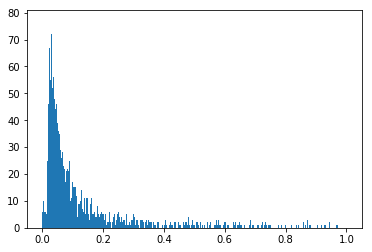

In [33]:
from astropy import visualization as vis

# supposed to have ~1950 bins, but the outlier at the array's start makes it impossible
vis.hist(fluxes,1000,range=(0,1))